<a href="https://colab.research.google.com/github/JxssmH/student-depression/blob/main/FinalProject_Modulo3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto de fin de modulo

## Depresion Estudiantil

La depresión estudiantil es un problema global que afecta el bienestar emocional, social y académico de millones de estudiantes. En los últimos años, la presión académica, el aislamiento social y la incertidumbre acerca del futuro han incrementado la prevalencia de este trastorno en entornos educativos. Este proyecto tiene como objetivo explorar un conjunto de datos sobre la depresión estudiantil para identificar patrones y factores de riesgo que puedan contribuir al desarrollo de estrategias de intervención y prevención. A través del análisis de datos, buscamos generar un entendimiento más profundo del impacto de la depresión en los estudiantes, ofreciendo una base para soluciones informadas y basadas en evidencia.

# ¿Por qué es importante?

La elección de este tema radica en la importancia de abordar la salud mental como un aspecto crítico del desarrollo humano. La depresión estudiantil no solo afecta la calidad de vida de quienes la padecen, sino también su desempeño académico y sus relaciones interpersonales. El análisis de datos relacionados con este problema permite detectar señales de alerta tempranas y diseñar políticas educativas más inclusivas y efectivas. Este proyecto contribuye al compromiso social de utilizar herramientas tecnológicas para abordar problemas complejos y promover el bienestar en comunidades vulnerables, en este caso, los estudiantes.

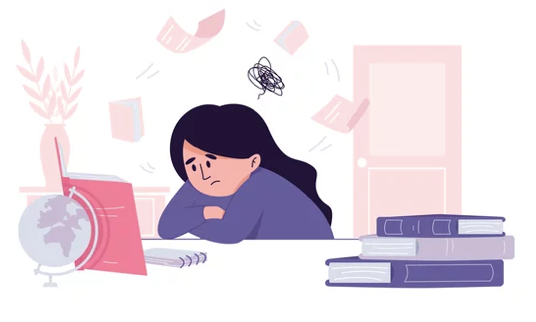

# Descripción del Dataset

El conjunto de datos utilizado en este proyecto está diseñado para analizar, comprender y predecir los niveles de depresión entre estudiantes. Contiene características relacionadas con factores demográficos, académicos, hábitos de estilo de vida y satisfacción personal. Los datos proporcionan una perspectiva integral que facilita la identificación de patrones asociados con la depresión estudiantil.

Características principales del dataset:

* ID: Identificador único para cada estudiante.
* Age: Edad del estudiante.
* Gender: Género (e.g., Masculino, Femenino).
* City: Región geográfica de residencia.
* CGPA: Promedio de calificaciones académicas o puntaje equivalente.
* Sleep Duration: Duración promedio de sueño diario.
* Profession: Profesión actual del estudiante.
* Work Pressure: Nivel de presión laboral experimentado.
* Academic Pressure: Nivel de presión académica experimentado.
* Study Satisfaction: Satisfacción general con los estudios.
* Job Satisfaction: Satisfacción con el trabajo, si aplica.
* Dietary Habits: Hábitos alimenticios.

Este conjunto de datos es valioso para la investigación en psicología, ciencia de datos y educación, ya que permite analizar factores de riesgo y diseñar estrategias de intervención temprana. Se ha tomado en cuenta la ética del manejo de datos sensibles, asegurando privacidad, anonimización y consentimiento informado para garantizar el uso responsable de la información.

#Librerías

In [18]:
!pip install kaggle
!apt-get update
!apt-get install -y espeak
!pip install librosa scikit-learn joblib gTTS soundfile

Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

In [19]:
from google.colab import files
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
import re
import random
import time
from gtts import gTTS
import librosa
from sklearn.svm import SVC
import joblib
import IPython.display as ipd
import warnings
import soundfile as sf
import plotly.express as px

# Dataset

In [20]:
# Permite al usuario seleccionar el archivo kaggle.json desde su PC
uploaded = files.upload()

# Crea la carpeta .kaggle si no existe
os.makedirs('/root/.kaggle', exist_ok=True)

# Mueve el archivo kaggle.json a la carpeta correcta
os.rename('kaggle.json', '/root/.kaggle/kaggle.json')

print("Archivo kaggle.json cargado y movido correctamente.")

Saving kaggle.json to kaggle.json
Archivo kaggle.json cargado y movido correctamente.


In [21]:
from kaggle.api.kaggle_api_extended import KaggleApi
# Inicializa la API de Kaggle
api = KaggleApi()
api.authenticate()  # Se autentica utilizando el archivo kaggle.json

# Nombre del dataset
dataset_name = 'hopesb/student-depression-dataset'

# Descargar el dataset y descomprimirlo
api.dataset_download_files(dataset_name, path='/content', unzip=True)

print("Dataset descargado exitosamente.")

Dataset URL: https://www.kaggle.com/datasets/hopesb/student-depression-dataset
Dataset descargado exitosamente.


In [22]:
# Ruta al archivo CSV dentro de Colab
file_path = '/content/Student Depression Dataset.csv'  # Ajusta según el archivo real

# Cargar el dataset en un DataFrame
df = pd.read_csv(file_path)

# Ver las primeras filas del dataset
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [23]:
df.info() #Visualización para saber tipos y datos nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

# Preproceso y modelo

<ipython-input-24-25d3ec5f75f0>:18: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





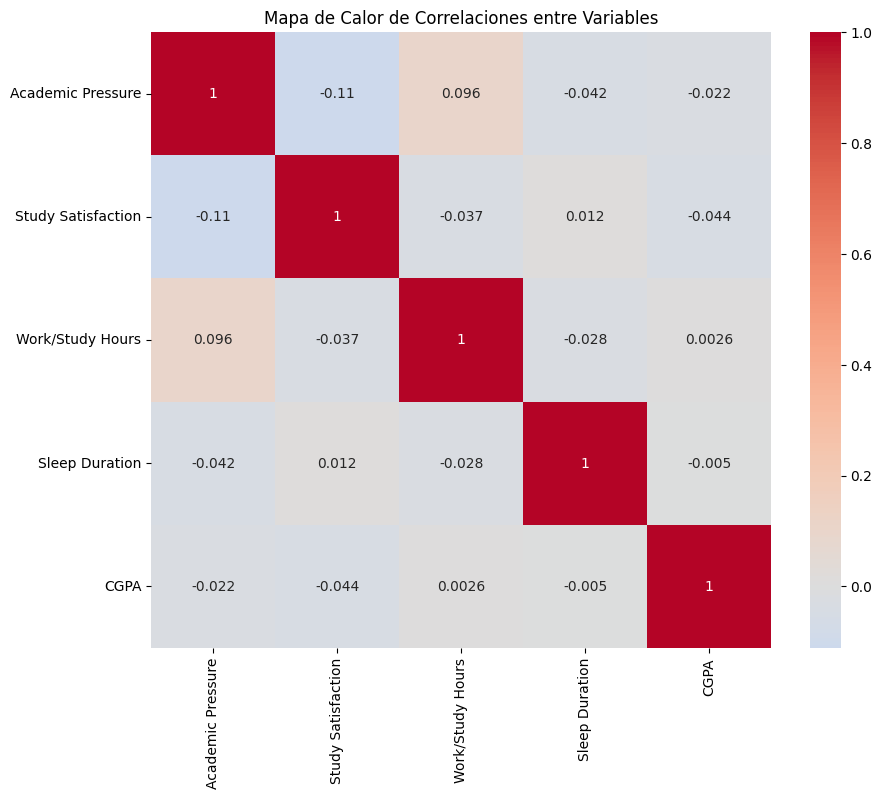

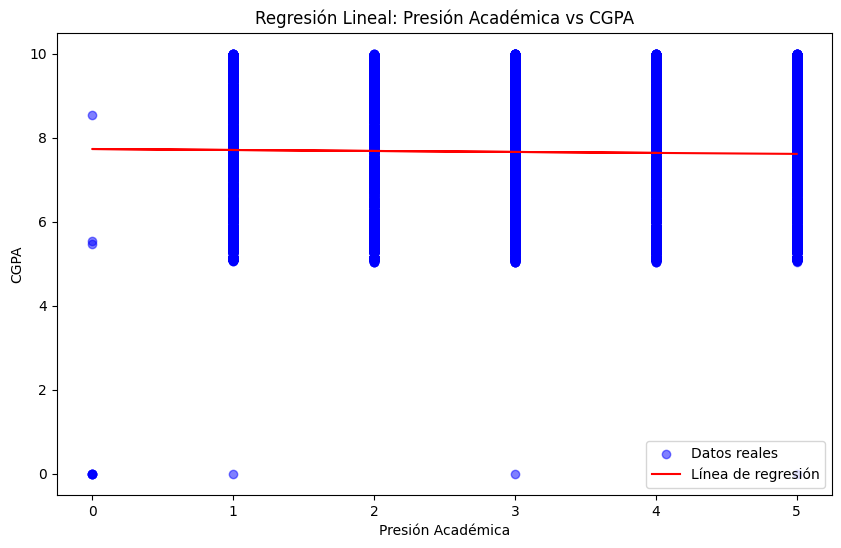


Resultados de Validación Cruzada:
Precisión media: 0.7431 (+/- 0.0107)

Matriz de Confusión:
[[1485  862]
 [ 592 2635]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.71      0.63      0.67      2347
           1       0.75      0.82      0.78      3227

    accuracy                           0.74      5574
   macro avg       0.73      0.72      0.73      5574
weighted avg       0.74      0.74      0.74      5574



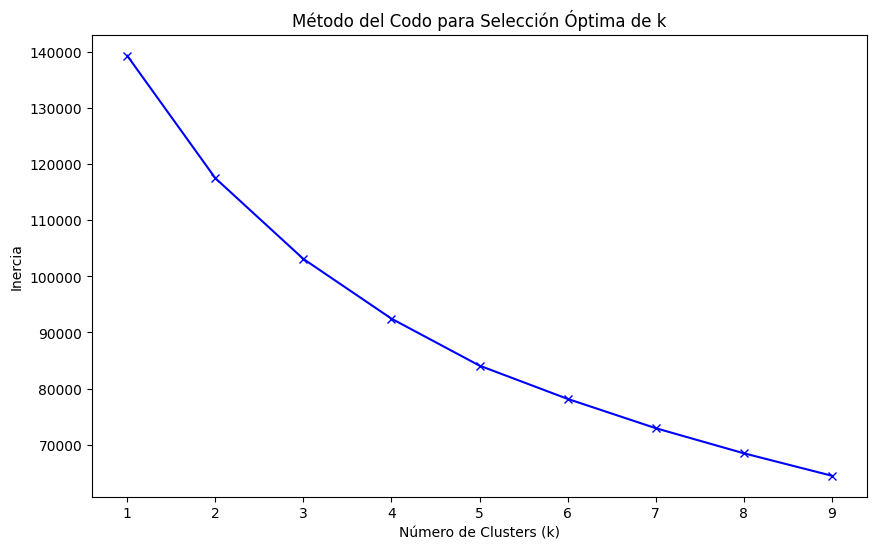

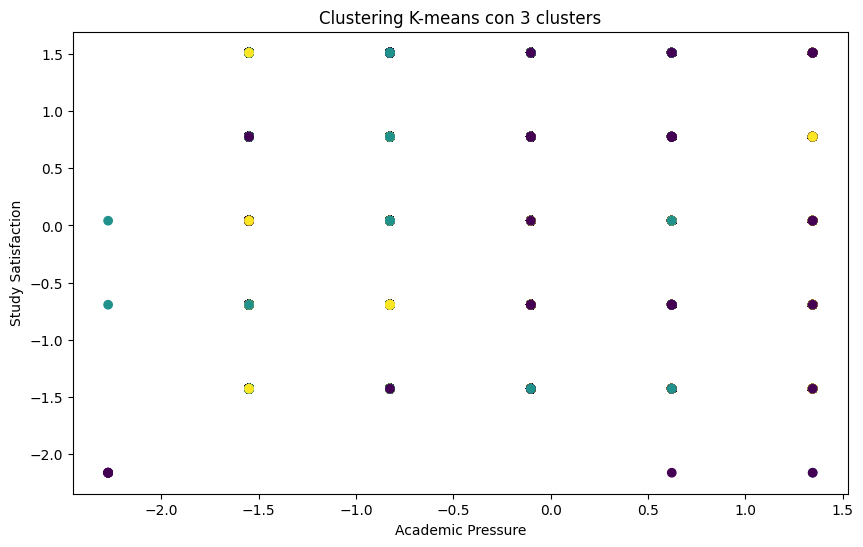


Características promedio por cluster:
                    Cluster 0  Cluster 1  Cluster 2
Academic Pressure    0.149011  -0.359597   0.153135
Study Satisfaction   0.082006   0.179613  -0.221020
Work/Study Hours     0.465751  -1.235656   0.568970
Sleep Duration       0.011484   0.098512  -0.090278
CGPA                -0.972411   0.101442   0.816387


In [24]:
# Filtrar solo estudiantes y hacer una copia para evitar SettingWithCopyWarning
estudiantes = df[df['Profession'] == 'Student'].copy()

# Convertir la columna 'Gender' a valores numéricos
gender_map = {'Male': 0, 'Female': 1}
estudiantes['Gender'] = estudiantes['Gender'].map(gender_map)

# Convertir la columna 'Sleep Duration' a valores numéricos
sleep_mapping = {
    'Less than 5 hours': 4,
    '5-6 hours': 5.5,
    '7-8 hours': 7.5,
    'More than 8 hours': 9
}
estudiantes['Sleep Duration'] = estudiantes['Sleep Duration'].map(sleep_mapping)

# Rellenar valores NaN con la mediana
estudiantes['Sleep Duration'].fillna(estudiantes['Sleep Duration'].median(), inplace=True)

# =======================
#  ANÁLISIS DE CORRELACIONES
# =======================

correlation_vars = ['Academic Pressure', 'Study Satisfaction', 'Work/Study Hours', 'Sleep Duration', 'CGPA']
correlation_matrix = estudiantes[correlation_vars].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Mapa de Calor de Correlaciones entre Variables')
plt.show()

# =======================
#  REGRESIÓN LINEAL SIMPLE
# =======================

X_simple = estudiantes[['Academic Pressure']].values
y_simple = estudiantes['CGPA'].values
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(X_simple, y_simple, test_size=0.2, random_state=42)

linear_model = LinearRegression()
linear_model.fit(X_train_simple, y_train_simple)

plt.figure(figsize=(10, 6))
plt.scatter(X_simple, y_simple, color='blue', alpha=0.5, label='Datos reales')
plt.plot(X_simple, linear_model.predict(X_simple), color='red', label='Línea de regresión')
plt.xlabel('Presión Académica')
plt.ylabel('CGPA')
plt.title('Regresión Lineal: Presión Académica vs CGPA')
plt.legend()
plt.show()

# =======================
#  VALIDACIÓN CRUZADA PARA MODELO DE CLASIFICACIÓN
# =======================

X = estudiantes[correlation_vars]
y = estudiantes['Depression']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

log_reg = LogisticRegression(random_state=42)
cv_scores = cross_val_score(log_reg, X_scaled, y, cv=5)

print("\nResultados de Validación Cruzada:")
print(f"Precisión media: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# =======================
#  CLUSTERING CON MÉTODO DEL CODO
# =======================

inertias = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, inertias, 'bx-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para Selección Óptima de k')
plt.show()

# Aplicar K-Means con k óptimo
k_optimo = 3  # Definir basado en la gráfica
kmeans_final = KMeans(n_clusters=k_optimo, random_state=42)
clusters = kmeans_final.fit_predict(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis')
plt.title(f'Clustering K-means con {k_optimo} clusters')
plt.xlabel(correlation_vars[0])
plt.ylabel(correlation_vars[1])
plt.show()

# Análisis de clusters
cluster_means = pd.DataFrame()
for i in range(k_optimo):
    cluster_data = X_scaled[clusters == i]
    cluster_means[f'Cluster {i}'] = np.mean(cluster_data, axis=0)
cluster_means.index = correlation_vars
print("\nCaracterísticas promedio por cluster:")
print(cluster_means)


**Resumen del Modelo de Predicción:**

El modelo de predicción que hemos entrenado tiene una precisión general del 74%. Esto significa que, en promedio, el modelo está tomando la decisión correcta en el 74% de los casos.


**¿Cómo se comporta con las diferentes clases?**

**Clase 0 (Casos negativos):**


*   **Precisión:** El modelo identificó correctamente los casos negativos el 71% de las veces.
*   **Recall:** Sin embargo, el modelo no encontró el 63% de todos los casos negativos, lo que significa que algunos de estos casos fueron mal clasificados como positivos.


**Clase 1 (Casos positivos):**


*   **Precisión**: El modelo fue más efectivo en identificar los casos positivos, con una precisión del 75%.
*   **Recall:** Además, encontró el 82% de los casos positivos, lo que significa que fue bastante bueno para reconocer los casos que realmente eran positivos.



  


**¿Cómo se compara el modelo en general?**

El modelo es más preciso al predecir la depresión que al identificar a quienes no la tienen.

**Exactitud total**: El modelo clasificó correctamente el 74% de todos los casos en general.
Promedio de las métricas: Cuando sumamos las métricas para ambas clases, el modelo mantiene un buen equilibrio, con precisión y recall de 73% y 72% respectivamente.

**Puntos a mejorar**:
Aunque el modelo tiene un buen desempeño en general, podría mejorar en identificar mejor los casos negativos. Hay un número significativo de falsos negativos en la clase 0, es decir, algunos casos negativos están siendo mal clasificados como positivos. Esto es algo que podríamos ajustar para mejorar la precisión en esa clase.

# Matriz de confunsión

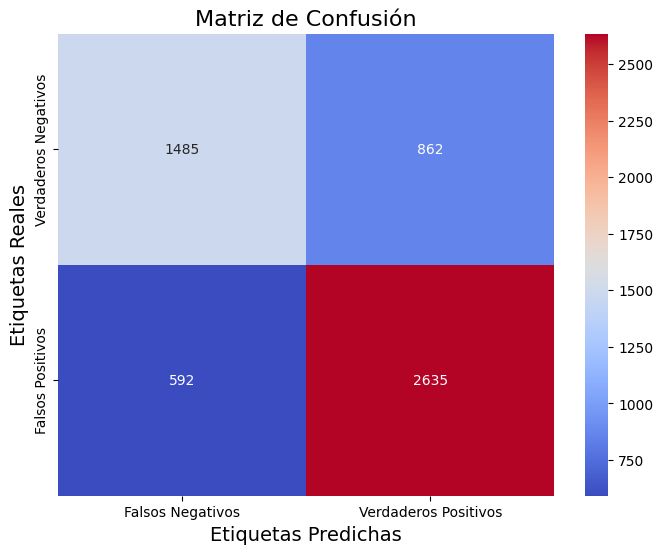


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.71      0.63      0.67      2347
           1       0.75      0.82      0.78      3227

    accuracy                           0.74      5574
   macro avg       0.73      0.72      0.73      5574
weighted avg       0.74      0.74      0.74      5574



In [25]:
# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión con un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=['Falsos Negativos', 'Verdaderos Positivos'],
            yticklabels=['Verdaderos Negativos', 'Falsos Positivos'])

# Etiquetas y título
plt.xlabel('Etiquetas Predichas', fontsize=14)
plt.ylabel('Etiquetas Reales', fontsize=14)
plt.title('Matriz de Confusión', fontsize=16)
plt.show()

# Imprimir el reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

La matriz de confusión muestra que el modelo identificó correctamente 2635 casos de depresión (verdaderos positivos) y 1485 casos sin depresión (verdaderos negativos). Sin embargo, cometió 862 errores, clasificando casos sin depresión como positivos (falsos positivos), y 592 casos positivos como negativos (falsos negativos). Esto refleja un rendimiento razonable, con algunos errores de clasificación en ambas clases.

# Mapa Coropletico para India

Esta visualización permite identificar áreas con mayores y menores tasas de depresión entre estudiantes, facilitando la comprensión espacial de este fenómeno y ayudando a enfocar esfuerzos en las regiones que requieren más atención en términos de salud mental estudiantil.

In [26]:
# Diccionario con coordenadas aproximadas de algunas ciudades de India
city_coords = {
    "Visakhapatnam": {"lat": 17.6868, "lon": 83.2185},
    "Bangalore": {"lat": 12.9716, "lon": 77.5946},
    "Srinagar": {"lat": 34.0837, "lon": 74.7973},
    "Varanasi": {"lat": 25.3176, "lon": 82.9739},
    "Jaipur": {"lat": 26.9124, "lon": 75.7873}
}

# Agregar latitud y longitud al DataFrame
df["lat"] = df["City"].map(lambda city: city_coords.get(city, {}).get("lat", None))
df["lon"] = df["City"].map(lambda city: city_coords.get(city, {}).get("lon", None))

# Filtrar ciudades con coordenadas disponibles
df = df.dropna(subset=["lat", "lon"])

# Agrupar por ciudad y calcular la media de depresión
df_city = df.groupby(["City", "lat", "lon"], as_index=False)["Depression"].mean()

# Crear el mapa con puntos coloreados según el nivel de depresión
fig = px.scatter_geo(
    df_city,
    lat="lat",
    lon="lon",
    hover_name="City",
    size="Depression",
    color="Depression",
    color_continuous_scale="Reds",
    title="Nivel Promedio de Depresión Estudiantil en India"
)

# Ajustar el mapa a India
fig.update_geos(
    center={"lat": 20.5937, "lon": 78.9629},  # Coordenadas de India
    projection_scale=4  # Zoom
)

fig.show()


# Análisis de Datos y Expansión a Europa

Hemos explorado los casos de depresión estudiantil en la India, pero este problema también está presente en otras partes del mundo. A través de esta visualización, mostramos cómo la depresión afecta a estudiantes en diferentes países de Europa, destacando su impacto en la región.

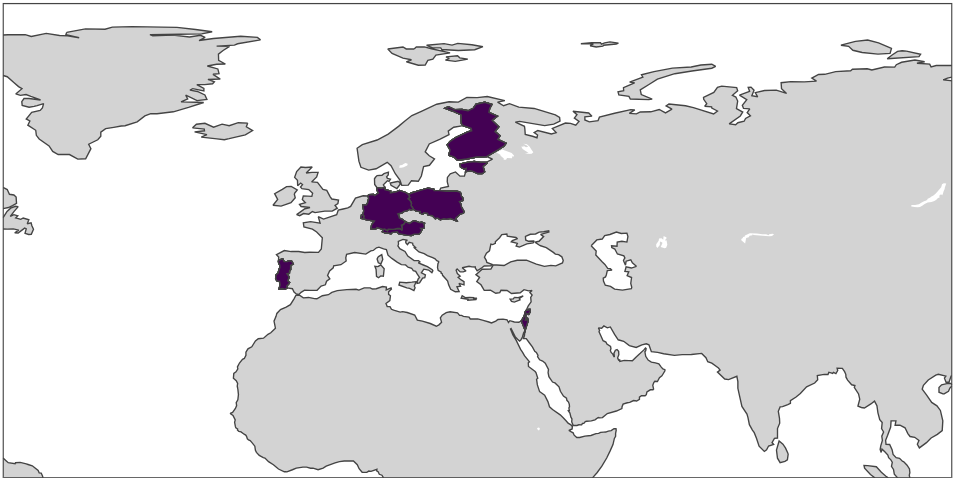

In [27]:
# Cargar datos
file_path = "/content/IHME-GBD_2021_DATA-dad2d31b-1.csv"
df_europa = pd.read_csv(file_path)

# Reemplazar nombres de regiones por países específicos
df_europa['location_name'] = df_europa['location_name'].replace({'Europa Oriental': 'Poland', 'Europa Occidental': 'Germany'})

# Asegurar que los valores sean numéricos
df_europa['val'] = pd.to_numeric(df_europa['val'], errors='coerce')
df_europa = df_europa.dropna(subset=['val'])

# Crear el mapa coroplético con mejoras visuales
fig = px.choropleth(
    df_europa,
    locations='location_name',
    locationmode='country names',
    color='val',
    color_continuous_scale='Viridis',
    labels={'val': 'Tasa de suicidio'},
    title='Suicidio estudiantil en Europa'
)

# Mejorar diseño del mapa
fig.update_layout(
    geo=dict(showcoastlines=True, showland=True, landcolor="lightgray"),
    coloraxis_colorbar=dict(title="Tasa de suicidio"),
    title_font=dict(size=20),
    template="plotly_white"
)

# Mostrar el mapa
fig.show()


# Implimentación de un **validor de voz** para poder protejer los datos sensibles

In [28]:
warnings.filterwarnings('ignore')

# Función para síntesis de voz
def reproducir_texto(texto):
    """Genera y reproduce audio a partir de texto."""
    tts = gTTS(texto, lang='es')
    tts.save("voz.mp3")
    return ipd.Audio("voz.mp3", autoplay=True)


# Módulo 1: Verificación de correo y contraseña
def validar_correo(correo):
    patron = r'^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$'
    return re.match(patron, correo) is not None

def validar_contrasena(contrasena):
    if len(contrasena) < 8:
        return False
    if not re.search(r'[A-Z]', contrasena):  # Al menos una letra mayúscula
        return False
    if not re.search(r'[a-z]', contrasena):  # Al menos una letra minúscula
        return False
    if not re.search(r'\d', contrasena):  # Al menos un número
        return False
    if not re.search(r'[!@#$%^&*(),.?":{}|<>]', contrasena):  # Al menos un carácter especial
        return False
    return True

def validar_credenciales():
    print("🔐 Módulo 1: Validación de Correo y Contraseña")
    while True:
        correo = input("Ingrese su correo electrónico: ")
        contrasena = input("Ingrese su contraseña: ")

        if validar_correo(correo) and validar_contrasena(contrasena):
            print("✅ Correo y contraseña válidos.")
            return True
        else:
            print("❌ Credenciales inválidas. Intente nuevamente.")
            reintentar = input("¿Desea intentar nuevamente? (s/n): ").lower()
            if reintentar != 's':
                return False

# Módulo 2: Generación y validación de NIP (
def generar_nip(longitud=4):
    return ''.join([str(random.randint(0, 9)) for _ in range(longitud)])

def validar_nip(nip_generado, nip_ingresado):
    if not nip_ingresado.isdigit():
        print("❌ El NIP solo debe contener números.")
        return False

    if len(nip_ingresado) != 4:
        print("❌ El NIP debe tener exactamente 4 dígitos.")
        return False

    return nip_ingresado == nip_generado

def proceso_autenticacion_nip():
    print("\n🔐 Módulo 2: Validación de NIP")
    nip_generado = generar_nip()
    print(f"🔑 NIP generado: {nip_generado}")

    intentos_maximos = 3
    for intento in range(intentos_maximos):
        nip_usuario = input(f"Ingrese el NIP (Intento {intento + 1} de {intentos_maximos}): ")

        if validar_nip(nip_generado, nip_usuario):
            print("✅ NIP correcto. Acceso concedido.")
            return True
        else:
            intentos_restantes = intentos_maximos - (intento + 1)
            print(f"❌ NIP incorrecto. Quedan {intentos_restantes} intentos.")

    print("🚫 Máximo de intentos alcanzado. Acceso denegado.")
    return False


# Módulo 3: Sistema de Validación de Voz
class SistemaValidacionVoz:
    def __init__(self):
        self.voces_autorizadas = {}
        self.modelo = None
        self.scaler = None

    def agregar_voz_autorizada(self, nombre, archivo_audio):
        try:
            caracteristicas = self.extraer_caracteristicas(archivo_audio)
            if caracteristicas is not None:
                self.voces_autorizadas[nombre] = caracteristicas
                print(f"Voz autorizada agregada: {nombre}")
                return True
            return False
        except Exception as e:
            print(f"Error al agregar voz: {str(e)}")
            return False

    def extraer_caracteristicas(self, archivo_audio):
        try:
            y, sr = librosa.load(archivo_audio, sr=16000, mono=True, duration=5)

            mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
            spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)
            chroma = librosa.feature.chroma_stft(y=y, sr=sr)
            rms = librosa.feature.rms(y=y)
            zero_crossing_rate = librosa.feature.zero_crossing_rate(y)

            features = np.concatenate([
                np.mean(mfcc.T, axis=0),
                np.mean(spectral_centroids.T, axis=0),
                np.mean(chroma.T, axis=0),
                np.mean(rms.T, axis=0),
                np.mean(zero_crossing_rate.T, axis=0)
            ])

            return features
        except Exception as e:
            print(f"Error al extraer características: {str(e)}")
            return None

    def entrenar_modelo(self):
        try:
            if len(self.voces_autorizadas) == 0:
                print("No hay voces autorizadas para entrenar el modelo.")
                return False

            X = []
            y = []

            # Crear conjunto de datos de entrenamiento
            for nombre, caracteristicas in self.voces_autorizadas.items():
                # Agregar muestra original
                X.append(caracteristicas)
                y.append(1)

                # Agregar variaciones
                num_variaciones = 10
                ruido_factor = 0.02  # 2% de ruido

                for _ in range(num_variaciones):
                    # Agregar ruido aleatorio
                    variacion = caracteristicas * (1 + np.random.uniform(-ruido_factor, ruido_factor, size=caracteristicas.shape))
                    X.append(variacion)
                    y.append(1)

                # Agregar muestras negativas (variaciones más extremas)
                for _ in range(5):
                    variacion_negativa = caracteristicas * (1 + np.random.uniform(-0.3, 0.3, size=caracteristicas.shape))
                    X.append(variacion_negativa)
                    y.append(0)

            X = np.array(X)
            y = np.array(y)

            # Preprocesamiento
            self.scaler = StandardScaler()
            X_scaled = self.scaler.fit_transform(X)

            # Entrenamiento con parámetros más flexibles
            self.modelo = SVC(
                kernel='rbf',
                C=0.8,  # Reducido para mayor generalización
                gamma='auto',
                probability=True,
                random_state=42,
                class_weight={0: 1, 1: 2}  # Dar más peso a las voces autorizadas
            )
            self.modelo.fit(X_scaled, y)

            # Guardar modelo y scaler
            joblib.dump(self.modelo, 'modelo_voz.pkl')
            joblib.dump(self.scaler, 'scaler_voz.pkl')
            print("Modelo entrenado y guardado exitosamente.")
            return True
        except Exception as e:
            print(f"Error durante el entrenamiento: {str(e)}")
            return False

    def validar_voz(self, archivo_audio, umbral_confianza=0.3):
        try:
            caracteristicas = self.extraer_caracteristicas(archivo_audio)
            if caracteristicas is None:
                return False, 0

            caracteristicas_scaled = self.scaler.transform([caracteristicas])
            probabilidad = self.modelo.predict_proba(caracteristicas_scaled)[0][1]

            # Usar un umbral más flexible
            es_autorizada = probabilidad >= umbral_confianza

            return es_autorizada, probabilidad
        except Exception as e:
            print(f"Error durante la validación: {str(e)}")
            return False, 0

def proceso_validacion_voz():
    """Proceso completo de validación de voz"""
    print("\n🎙️ Módulo 3: Validación de Voz")

    sistema = SistemaValidacionVoz()
    print("Por favor, suba un archivo de audio .wav para registrar su voz:")
    uploaded = files.upload()

    if not uploaded:
        print("❌ No se subió ningún archivo.")
        return False

    archivo = list(uploaded.keys())[0]
    if sistema.agregar_voz_autorizada("usuario", archivo):
        if not sistema.entrenar_modelo():
            return False

        print("Por favor, suba un nuevo archivo de audio para validación:")
        validation_upload = files.upload()
        archivo_validacion = list(validation_upload.keys())[0]
        es_autorizada, probabilidad = sistema.validar_voz(archivo_validacion)
        return es_autorizada

# Módulo 4: Felicitaciones
def felicitaciones():
    """Mostrar mensaje de felicitaciones después de pasar todas las verificaciones"""
    print("\n🎉 Módulo 4: ¡Felicidades! Has pasado la verificación con éxito.")
    reproducir_texto("Felicidades, has pasado la verificación con éxito.")

# Función principal
def autenticacion_completa():
    if not validar_credenciales():
        return False
    if not proceso_autenticacion_nip():
        return False
    if not proceso_validacion_voz():
        return False
    felicitaciones()  # Llamamos al módulo 4 para felicitar al usuario
    return True

if __name__ == "__main__":
    autenticacion_completa()

🔐 Módulo 1: Validación de Correo y Contraseña
Ingrese su correo electrónico: jxss@gmail.com
Ingrese su contraseña: Philipinas?01
✅ Correo y contraseña válidos.

🔐 Módulo 2: Validación de NIP
🔑 NIP generado: 9201
Ingrese el NIP (Intento 1 de 3): 9201
✅ NIP correcto. Acceso concedido.

🎙️ Módulo 3: Validación de Voz
Por favor, suba un archivo de audio .wav para registrar su voz:


Saving voz_autorizada.wav to voz_autorizada.wav
Voz autorizada agregada: usuario
Modelo entrenado y guardado exitosamente.
Por favor, suba un nuevo archivo de audio para validación:


Saving voz_autorizada.wav to voz_autorizada (1).wav

🎉 Módulo 4: ¡Felicidades! Has pasado la verificación con éxito.
